In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

print(" Загрузка датасета Reuters...")
NUM_WORDS = 10000
NUM_CLASSES = 46

# Загрузка данных
(x_train, y_train), (x_test, y_test) = reuters.load_data(
    num_words=NUM_WORDS,
    test_split=0.2,
    seed=42
)

print(" Данные успешно загружены!")
print(f" Обучающая выборка: {len(x_train)} примеров")
print(f" Тестовая выборка: {len(x_test)} примеров")
print(f" Количество классов: {NUM_CLASSES}")

# Анализ распределения классов
unique, counts = np.unique(y_train, return_counts=True)
print(f" Распределение классов в обучающей выборке:")
for cls, count in zip(unique[:10], counts[:10]):
    print(f"   Класс {cls}: {count} примеров")

 Загрузка датасета Reuters...
 Данные успешно загружены!
 Обучающая выборка: 8982 примеров
 Тестовая выборка: 2246 примеров
 Количество классов: 46
 Распределение классов в обучающей выборке:
   Класс 0: 57 примеров
   Класс 1: 424 примеров
   Класс 2: 77 примеров
   Класс 3: 3184 примеров
   Класс 4: 1916 примеров
   Класс 5: 18 примеров
   Класс 6: 54 примеров
   Класс 7: 16 примеров
   Класс 8: 147 примеров
   Класс 9: 101 примеров


In [ ]:
# MULTI-HOT ENCODING

def multi_hot_encoding(sequences, num_words, remove_k_first=0):
    """
    Преобразование последовательностей в multi-hot векторы
    """
    results = np.zeros((len(sequences), num_words))
    for i, sequence in enumerate(sequences):
        # Устанавливаем 1 для всех слов в последовательности
        for word_index in sequence:
            if word_index >= remove_k_first and word_index < num_words:
                results[i, word_index] = 1.0
    return results

print("\n Применение Multi-Hot Encoding...")
x_train_multi_hot = multi_hot_encoding(x_train, num_words=NUM_WORDS)
x_test_multi_hot = multi_hot_encoding(x_test, num_words=NUM_WORDS)

print(f" Размерность данных после Multi-Hot Encoding:")
print(f"   x_train: {x_train_multi_hot.shape}")
print(f"   x_test: {x_test_multi_hot.shape}")

# One-Hot Encoding для меток
y_train_categorical = to_categorical(y_train, NUM_CLASSES)
y_test_categorical = to_categorical(y_test, NUM_CLASSES)

print(f" Метки после One-Hot Encoding:")
print(f"   y_train: {y_train_categorical.shape}")
print(f"   y_test: {y_test_categorical.shape}")


 Применение Multi-Hot Encoding...
 Размерность данных после Multi-Hot Encoding:
   x_train: (8982, 10000)
   x_test: (2246, 10000)
 Метки после One-Hot Encoding:
   y_train: (8982, 46)
   y_test: (2246, 46)


In [ ]:

#СОЗДАНИЕ МОДЕЛИ (ВАРИАНТ 20)


def create_multiclass_classifier_v20():
    """
    Создание модели согласно варианту 20:
    - 4 скрытых слоя: 32-16-32-16 нейронов
    - Функции активации: relu-relu-relu-elu
    """
    # Входной слой
    input_layer = Input(shape=(NUM_WORDS,), name='input_layer')

    # Первый скрытый слой: 32 нейрона, relu
    hidden_1 = Dense(32, activation='relu', name='hidden_1')(input_layer)
    hidden_1 = Dropout(0.3, name='dropout_1')(hidden_1)

    # Второй скрытый слой: 16 нейронов, relu
    hidden_2 = Dense(16, activation='relu', name='hidden_2')(hidden_1)
    hidden_2 = Dropout(0.3, name='dropout_2')(hidden_2)

    # Третий скрытый слой: 32 нейрона, relu
    hidden_3 = Dense(32, activation='relu', name='hidden_3')(hidden_2)
    hidden_3 = Dropout(0.3, name='dropout_3')(hidden_3)

    # Четвертый скрытый слой: 16 нейронов, elu
    hidden_4 = Dense(16, activation='elu', name='hidden_4')(hidden_3)
    hidden_4 = Dropout(0.3, name='dropout_4')(hidden_4)

    # Выходной слой: 46 нейронов, softmax
    output_layer = Dense(NUM_CLASSES, activation='softmax', name='output_layer')(hidden_4)

    # Создание модели
    model = Model(inputs=input_layer, outputs=output_layer, name='reuters_classifier_v20')

    return model

# Создаем модель
print("\n Создание модели (Вариант 20)...")
model_v20 = create_multiclass_classifier_v20()

print(" Архитектура модели:")
model_v20.summary()

# Визуализация архитектуры
try:
    tf.keras.utils.plot_model(
        model_v20,
        show_shapes=True,
        show_layer_activations=True,
        show_layer_names=True
    )
except:
    print(" Graphviz не установлен, визуализация пропущена")


 Создание модели (Вариант 20)...
 Архитектура модели:


Model: "reuters_classifier_v20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 10000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_1 (Dense)                │ (None, 32)             │       320,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_2 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_3 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_4 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 46)             │           782 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 322,414 (1.23 MB)

 Trainable params: 322,414 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# КОМПИЛЯЦИЯ И ОБУЧЕНИЕ


# Компиляция модели
model_v20.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',  # Многокатегориальная перекрестная энтропия
    metrics=['accuracy']
)

print("\n Настройка коллбэков...")
# Коллбэки
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=4,  # Останавливаем если 4 эпохи нет улучшения
        restore_best_weights=True,
        verbose=1
    ),
    ModelCheckpoint(
        filepath='best_reuters_model_v20.keras',
        monitor='val_loss',
        save_best_only=True,
        verbose=1
    )
]

print(" Начало обучения модели...")
history_v20 = model_v20.fit(
    x_train_multi_hot,
    y_train_categorical,
    epochs=15,
    batch_size=32,
    validation_split=0.1,
    callbacks=callbacks,
    verbose=1
)



 Настройка коллбэков...
 Начало обучения модели...
Epoch 1/15
252/253 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2737 - loss: 3.0493
Epoch 1: val_loss improved from inf to 1.66737, saving model to best_reuters_model_v20.keras
253/253 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.2747 - loss: 3.0448 - val_accuracy: 0.5484 - val_loss: 1.6674
Epoch 2/15
252/253 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5311 - loss: 1.8290
Epoch 2: val_loss improved from 1.66737 to 1.56087, saving model to best_reuters_model_v20.keras
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5312 - loss: 1.8286 - val_accuracy: 0.5907 - val_loss: 1.5609
Epoch 3/15
250/253 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5824 - loss: 1.6202
Epoch 3: val_loss improved from 1.56087 to 1.50856, saving model to best_reuters_model_v20.keras
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5824 - loss: 1.6206 - val_accuracy: 0.6196 - val_loss: 1.5086
Epoch 4/15
249/253 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/ste

In [ ]:

# ОЦЕНКА МОДЕЛИ

print("\nОЦЕНКА РЕЗУЛЬТАТОВ:")
print("="*50)

# Загрузка лучшей версии модели
try:
    model_v20 = tf.keras.models.load_model('best_reuters_model_v20.keras')
    print(" Загружена лучшая версия модели")
except:
    print(" Используется последняя версия модели")

# Оценка на тестовых данных
test_loss_v20, test_acc_v20 = model_v20.evaluate(
    x_test_multi_hot,
    y_test_categorical,
    verbose=0
)

print(f" Модель (Вариант 20):")
print(f"    Потери: {test_loss_v20:.4f}")
print(f"    Точность: {test_acc_v20:.4f}")


ОЦЕНКА РЕЗУЛЬТАТОВ:
 Загружена лучшая версия модели
 Модель (Вариант 20):
    Потери: 1.5770
    Точность: 0.6679



 ВИЗУАЛИЗАЦИЯ ПРОЦЕССА ОБУЧЕНИЯ...


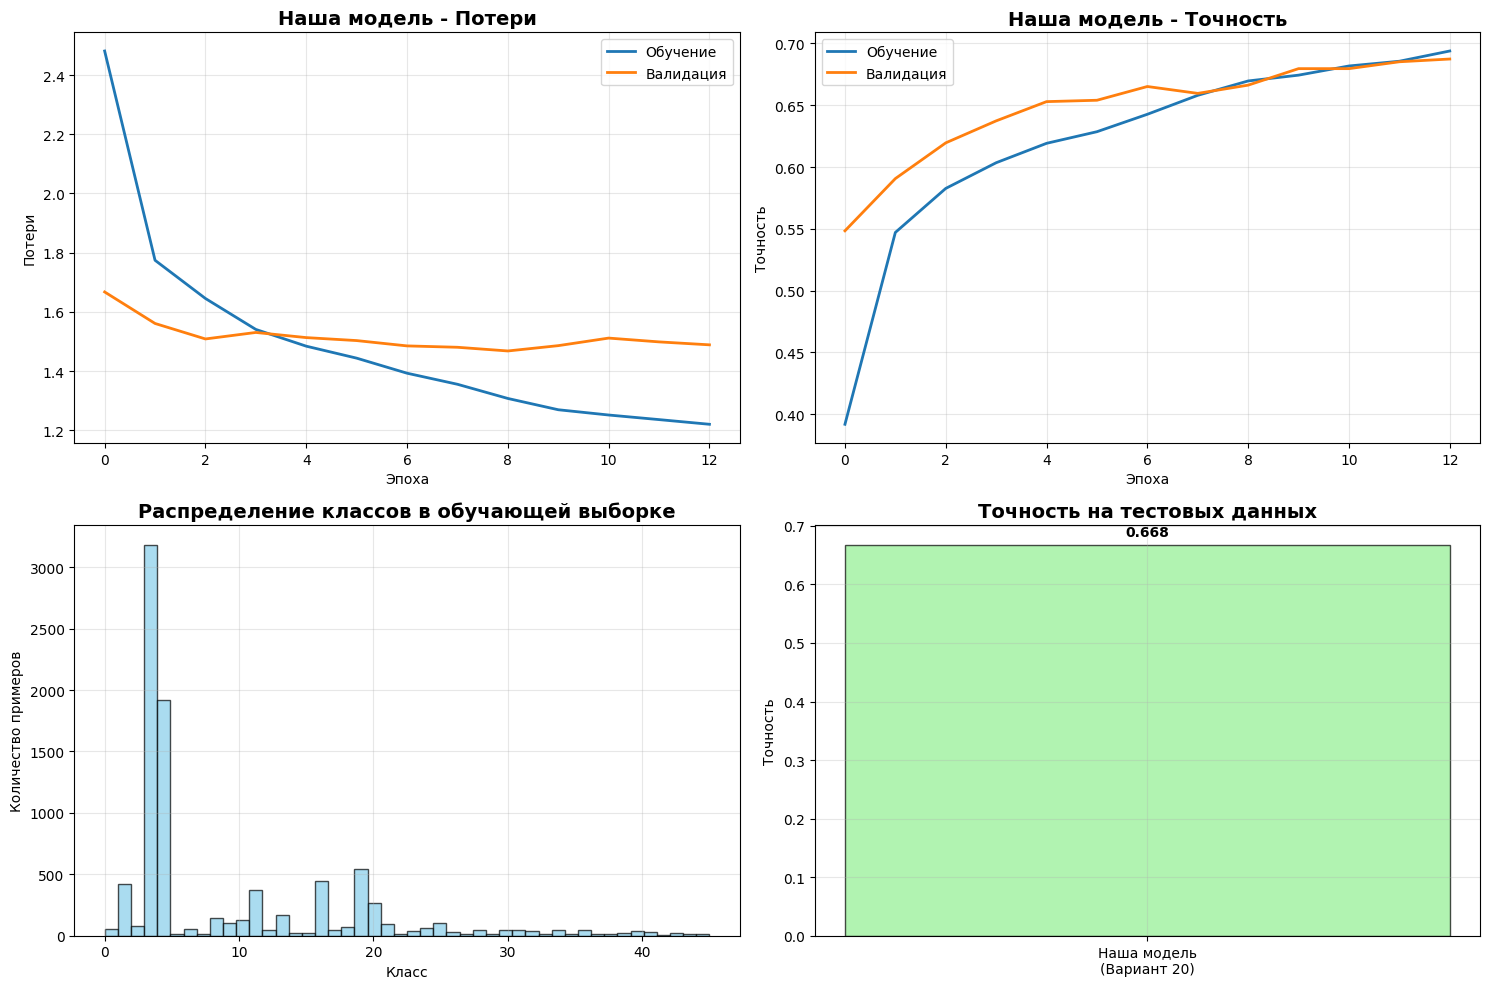

In [ ]:
# ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ


print("\n ВИЗУАЛИЗАЦИЯ ПРОЦЕССА ОБУЧЕНИЯ...")

# Создание графиков
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Графики потерь
axes[0, 0].plot(history_v20.history['loss'], label='Обучение', linewidth=2)
axes[0, 0].plot(history_v20.history['val_loss'], label='Валидация', linewidth=2)
axes[0, 0].set_title('Наша модель - Потери', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Эпоха')
axes[0, 0].set_ylabel('Потери')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Графики точности
axes[0, 1].plot(history_v20.history['accuracy'], label='Обучение', linewidth=2)
axes[0, 1].plot(history_v20.history['val_accuracy'], label='Валидация', linewidth=2)
axes[0, 1].set_title('Наша модель - Точность', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Эпоха')
axes[0, 1].set_ylabel('Точность')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Гистограмма распределения классов
axes[1, 0].hist(y_train, bins=NUM_CLASSES, alpha=0.7, color='skyblue', edgecolor='black')
axes[1, 0].set_title('Распределение классов в обучающей выборке', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Класс')
axes[1, 0].set_ylabel('Количество примеров')
axes[1, 0].grid(True, alpha=0.3)

# Сравнение точности
models = ['Наша модель\n(Вариант 20)']
accuracies = [test_acc_v20]
colors = ['lightgreen']

bars = axes[1, 1].bar(models, accuracies, color=colors, alpha=0.7, edgecolor='black')
axes[1, 1].set_title('Точность на тестовых данных', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Точность')
axes[1, 1].grid(True, alpha=0.3)

# Добавление значений на столбцы
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
# ПРИМЕР ПРЕДСКАЗАНИЯ

print("\n ПРИМЕР ПРЕДСКАЗАНИЯ НА ТЕСТОВЫХ ДАННЫХ:")

# Функция для декодирования
def decode_review(sequence, word_index):
    reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in sequence])

# Получаем word_index
word_index = reuters.get_word_index()

# Выбираем пример для демонстрации (с индексом 122)
demo_index = 122
demo_sequence = x_test[demo_index]
true_label = y_test[demo_index]

print(f" Пример статьи #{demo_index}:")
print(f"   Истинный класс: {true_label}")

# Получаем предсказание
prediction = model_v20.predict(np.array([x_test_multi_hot[demo_index]]), verbose=0)[0]
predicted_class = np.argmax(prediction)
confidence = np.max(prediction)

print(f" Предсказание модели:")
print(f"   Класс: {predicted_class}")
print(f"   Уверенность: {confidence:.4f}")


# Проверяем правильность предсказания
if predicted_class == true_label:
    print(" Модель правильно классифицировала статью!")
else:
    print(" Модель ошиблась в классификации.")


 ПРИМЕР ПРЕДСКАЗАНИЯ НА ТЕСТОВЫХ ДАННЫХ:
 Пример статьи #122:
   Истинный класс: 4
 Предсказание модели:
   Класс: 4
   Уверенность: 0.9998
 Модель правильно классифицировала статью!


In [ ]:
# АНАЛИЗ РЕЗУЛЬТАТОВ

print("\nАНАЛИЗ РЕЗУЛЬТАТОВ:")
print("="*50)

print("АРХИТЕКТУРА МОДЕЛИ:")
print("   • 4 скрытых слоя: 32-16-32-16 нейронов")
print("   • Функции активации: relu-relu-relu-elu")
print("   • Dropout: 0.3 на каждом скрытом слое")
print("   • Выход: 46 нейронов с softmax")

print(f"\nРЕЗУЛЬТАТЫ:")
print(f"   • Финальная точность: {test_acc_v20:.4f}")
print(f"   • Финальные потери: {test_loss_v20:.4f}")

# Анализ переобучения
final_train_acc = history_v20.history['accuracy'][-1]
final_val_acc = history_v20.history['val_accuracy'][-1]
overfitting_gap = final_train_acc - final_val_acc

print(f"\n АНАЛИЗ ПЕРЕОБУЧЕНИЯ:")
print(f"   • Точность на обучении: {final_train_acc:.4f}")
print(f"   • Точность на валидации: {final_val_acc:.4f}")
print(f"   • Разница: {overfitting_gap:.4f}")

if overfitting_gap < 0.05:
    print("   Переобучение минимальное")
elif overfitting_gap < 0.1:
    print("   Умеренное переобучение")
else:
    print("   Значительное переобучение")

print("\n ВЫВОД:")
print("   Модель с архитектурой 32-16-32-16 и активациями relu-relu-relu-elu")
print(f"   показала точность {test_acc_v20:.1%} на тестовых данных.")
print("   Dropout слои помогли контролировать переобучение.")


АНАЛИЗ РЕЗУЛЬТАТОВ:
АРХИТЕКТУРА МОДЕЛИ:
   • 4 скрытых слоя: 32-16-32-16 нейронов
   • Функции активации: relu-relu-relu-elu
   • Dropout: 0.3 на каждом скрытом слое
   • Выход: 46 нейронов с softmax

РЕЗУЛЬТАТЫ:
   • Финальная точность: 0.6679
   • Финальные потери: 1.5770

 АНАЛИЗ ПЕРЕОБУЧЕНИЯ:
   • Точность на обучении: 0.6939
   • Точность на валидации: 0.6874
   • Разница: 0.0065
   Переобучение минимальное

 ВЫВОД:
   Модель с архитектурой 32-16-32-16 и активациями relu-relu-relu-elu
   показала точность 66.8% на тестовых данных.
   Dropout слои помогли контролировать переобучение.



СОЗДАНИЕ И ОБУЧЕНИЕ БАЗОВОЙ МОДЕЛИ ДЛЯ СРАВНЕНИЯ
 Архитектура базовой модели:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │       640,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 46)             │         2,990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 647,214 (2.47 MB)

 Trainable params: 647,214 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

 Обучение базовой модели...
Epoch 1/15
253/253 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.4690 - loss: 2.3271 - val_accuracy: 0.7230 - val_loss: 1.2420
Epoch 2/15
253/253 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.7306 - loss: 1.1678 - val_accuracy: 0.7553 - val_loss: 1.0926
Epoch 3/15
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.7873 - loss: 0.9271 - val_accuracy: 0.7920 - val_loss: 0.9928
Epoch 4/15
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8293 - loss: 0.7352 - val_accuracy: 0.8031 - val_loss: 0.9739
Epoch 5/15
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8486 - loss: 0.6297 - val_accuracy: 0.8131 - val_loss: 0.9995
Epoch 6/15
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8849 - loss: 0.5183 - val_accuracy: 0.8142 - val_loss: 1.0253
Epoch 7/15
253/253 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8851 - loss: 0.4953 - val_accuracy: 0.8076 - val_loss: 1.0766
Epoch 8/15
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.90

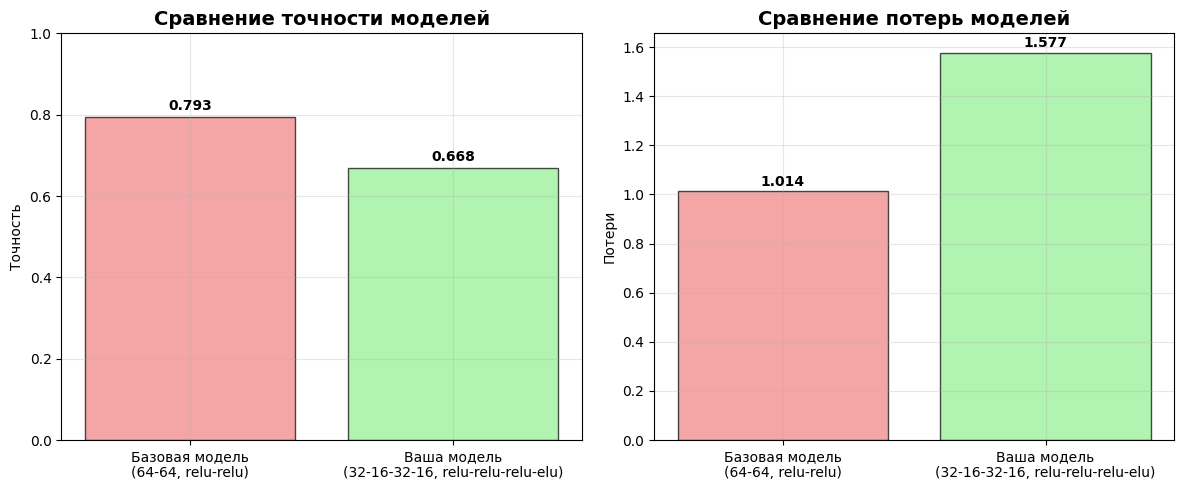

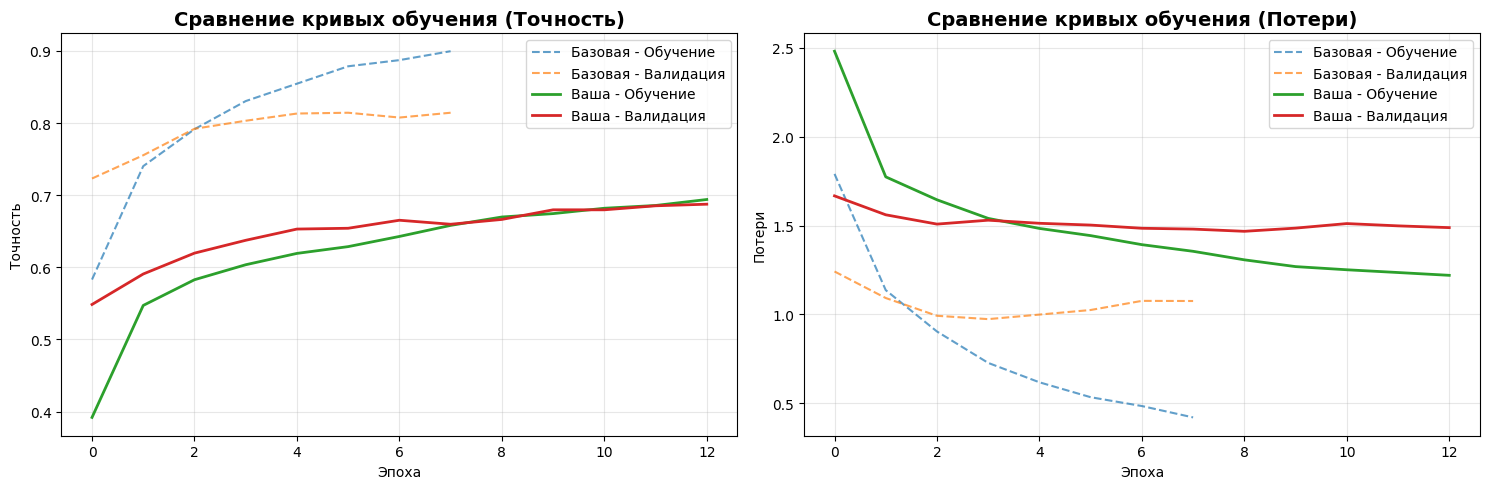


ФИНАЛЬНЫЙ ВЫВОД ПО СРАВНЕНИЮ
ХАРАКТЕРИСТИКИ МОДЕЛЕЙ:
   Базовая модель: 2 слоя (64-64), relu-relu
   Ваша модель: 4 слоя (32-16-32-16), relu-relu-relu-elu

РЕЗУЛЬТАТЫ:
   • Точность базовой модели: 0.7934
   • Точность вашей модели:  0.6679
   • Разница: -0.1256

 ВЫВОД: Базовая модель показала лучший результат.


In [ ]:
# СРАВНЕНИЕ С БАЗОВОЙ МОДЕЛЬЮ


from tensorflow.keras.models import Sequential

print("\n" + "="*60)
print("СОЗДАНИЕ И ОБУЧЕНИЕ БАЗОВОЙ МОДЕЛИ ДЛЯ СРАВНЕНИЯ")
print("="*60)

# Базовая модель (2 слоя, 64-64, relu-relu)
base_model = Sequential([
    Dense(64, activation='relu', input_shape=(NUM_WORDS,)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(NUM_CLASSES, activation='softmax')
])

base_model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print(" Архитектура базовой модели:")
base_model.summary()

# Обучение базовой модели с коллбэками
base_callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=4,
        restore_best_weights=True,
        verbose=1
    )
]

print(" Обучение базовой модели...")
base_history = base_model.fit(
    x_train_multi_hot,
    y_train_categorical,
    epochs=15,
    batch_size=32,
    validation_split=0.1,
    callbacks=base_callbacks,
    verbose=1
)

# Оценка базовой модели
base_test_loss, base_test_acc = base_model.evaluate(
    x_test_multi_hot,
    y_test_categorical,
    verbose=0
)

print("\n" + "="*50)
print("СРАВНЕНИЕ РЕЗУЛЬТАТОВ:")
print("="*50)
print(f"Ваша модель (4 слоя, 32-16-32-16, relu-relu-relu-elu): {test_acc_v20:.4f}")
print(f"Базовая модель (2 слоя, 64-64, relu-relu): {base_test_acc:.4f}")

# Детальный анализ
improvement = test_acc_v20 - base_test_acc
improvement_percent = improvement * 100

print(f"\nДЕТАЛЬНЫЙ АНАЛИЗ:")
print(f"   Разница в точности: {improvement:+.4f} ({improvement_percent:+.2f}%)")

if improvement > 0.01:
    print("    Ваша модель значительно лучше базовой!")
elif improvement > 0:
    print("    Ваша модель немного лучше базовой")
elif improvement > -0.01:
    print("     Модели показывают схожие результаты")
else:
    print("    Базовая модель показывает лучшие результаты")

# Визуализация сравнения
plt.figure(figsize=(12, 5))

# Сравнение точности
plt.subplot(1, 2, 1)
models = ['Базовая модель\n(64-64, relu-relu)', 'Ваша модель\n(32-16-32-16, relu-relu-relu-elu)']
accuracies = [base_test_acc, test_acc_v20]
colors = ['lightcoral', 'lightgreen']

bars = plt.bar(models, accuracies, color=colors, alpha=0.7, edgecolor='black')
plt.title('Сравнение точности моделей', fontsize=14, fontweight='bold')
plt.ylabel('Точность')
plt.ylim(0, 1)
plt.grid(True, alpha=0.3)

# Добавление значений на столбцы
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')

# Сравнение потерь
plt.subplot(1, 2, 2)
losses = [base_test_loss, test_loss_v20]
colors_loss = ['lightcoral', 'lightgreen']

bars_loss = plt.bar(models, losses, color=colors_loss, alpha=0.7, edgecolor='black')
plt.title('Сравнение потерь моделей', fontsize=14, fontweight='bold')
plt.ylabel('Потери')
plt.grid(True, alpha=0.3)

# Добавление значений на столбцы
for bar, loss in zip(bars_loss, losses):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{loss:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Сравнение кривых обучения
plt.figure(figsize=(15, 5))

# Точность
plt.subplot(1, 2, 1)
plt.plot(base_history.history['accuracy'], label='Базовая - Обучение', linestyle='--', alpha=0.7)
plt.plot(base_history.history['val_accuracy'], label='Базовая - Валидация', linestyle='--', alpha=0.7)
plt.plot(history_v20.history['accuracy'], label='Ваша - Обучение', linewidth=2)
plt.plot(history_v20.history['val_accuracy'], label='Ваша - Валидация', linewidth=2)
plt.title('Сравнение кривых обучения (Точность)', fontsize=14, fontweight='bold')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()
plt.grid(True, alpha=0.3)

# Потери
plt.subplot(1, 2, 2)
plt.plot(base_history.history['loss'], label='Базовая - Обучение', linestyle='--', alpha=0.7)
plt.plot(base_history.history['val_loss'], label='Базовая - Валидация', linestyle='--', alpha=0.7)
plt.plot(history_v20.history['loss'], label='Ваша - Обучение', linewidth=2)
plt.plot(history_v20.history['val_loss'], label='Ваша - Валидация', linewidth=2)
plt.title('Сравнение кривых обучения (Потери)', fontsize=14, fontweight='bold')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Финальный вывод
print("\n" + "="*60)
print("ФИНАЛЬНЫЙ ВЫВОД ПО СРАВНЕНИЮ")
print("="*60)
print("ХАРАКТЕРИСТИКИ МОДЕЛЕЙ:")
print("   Базовая модель: 2 слоя (64-64), relu-relu")
print("   Ваша модель: 4 слоя (32-16-32-16), relu-relu-relu-elu")
print(f"\nРЕЗУЛЬТАТЫ:")
print(f"   • Точность базовой модели: {base_test_acc:.4f}")
print(f"   • Точность вашей модели:  {test_acc_v20:.4f}")
print(f"   • Разница: {improvement:+.4f}")

if improvement > 0:
    print(f"\n ВЫВОД: Ваша модель с архитектурой 32-16-32-16 и активациями")
    print(f"   relu-relu-relu-elu превзошла базовую модель на {improvement_percent:+.2f}%")
    print("   Это демонстрирует эффективность более глубокой архитектуры с ELU-активацией.")
else:
    print(f"\n ВЫВОД: Базовая модель показала лучший результат.")
